# Assignment


## About the dataset
The data set you will be using is from the UCI Machine Learning DataSet repository.  
http://mlr.cs.umass.edu/ml/datasets/Balance+Scale
The data set came in two parts: The data and descriptions.  I added the feature names to the front of the data file to make it readable as a CSV file.  You can see all three files in the project directory.

It is a Balance scale weight & distance database.  You have a left weight and distance and a right weight and distance.  There are three categories:
* B is balanced
* L is scale tips left
* R is scale tips right

There is a simple computation that you can do to determine the category based on the features:  Compute left weight*distance and right weight * distance.  If the left product is greater, then we have a tip left, equal is balanced, right greater is tip right.

This data set exhaustively gives examples for all 625 posible combinations of weights of 1, 2, 3, 4, 5 with distances of 1, 2, 3, 4, 5.

If generating new instances, we should restrict the weight and distance to be positive.

## Part 1 - Get the DataSet
Read balance-scale.csv into a data frame and use head to look at it.

In [1]:
import pandas as pd
data_frame = pd.read_csv("balance-scale.csv")
print(data_frame.keys())
data_frame.head(n=5)

Index(['Class', 'Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance'],
      dtype='object')


,Class,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


## Part 2 - Add two new features Left-Product and Right-Product
Compute Left-Weight times Left-Distance and add it as a feature (Left-Product). Do the same for the right.  Look at the data and verify.

In [8]:
data_frame["Left-Product"] = data_frame["Left-Weight"]*data_frame["Left-Distance"]
data_frame["Right-Product"] = data_frame["Right-Weight"]*data_frame["Right-Distance"]
print(data_frame)

    Class  Left-Weight      ...        Left-Product  Right-Product
0       B            1      ...                   1              1
1       R            1      ...                   1              2
2       R            1      ...                   1              3
3       R            1      ...                   1              4
4       R            1      ...                   1              5
5       R            1      ...                   1              2
6       R            1      ...                   1              4
7       R            1      ...                   1              6
8       R            1      ...                   1              8
9       R            1      ...                   1             10
10      R            1      ...                   1              3
11      R            1      ...                   1              6
12      R            1      ...                   1              9
13      R            1      ...                   1           

## Part 3 - Partition and Plot
Partition the data frame by class and then do a scatter plot of the Left-Product vs. the Right-Product with each of the classes in a different color.  Label the axis and create a legend.

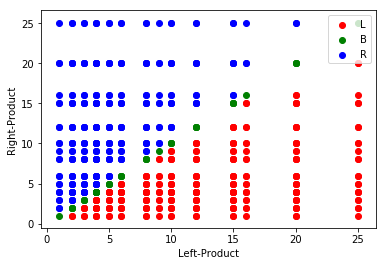

In [38]:
import numpy as np
b_left_produt = np.ma.masked_where(data_frame['Class'] != 'B', data_frame['Left-Product'])
r_left_produt = np.ma.masked_where(data_frame['Class'] != 'R', data_frame['Left-Product'])
l_left_produt = np.ma.masked_where(data_frame['Class'] != 'L', data_frame['Left-Product'])

# do a scatter plot
import matplotlib.pyplot as plt
plt.scatter(l_left_produt, data_frame['Right-Product'], color="red")
plt.scatter(b_left_produt, data_frame['Right-Product'], color="green")
plt.scatter(r_left_produt, data_frame['Right-Product'], color="blue")
plt.xlabel("Left-Product")
plt.ylabel("Right-Product")
plt.legend(["L","B","R"])
plt.show()

## Part 4 - Building the decision tree
Train a decision tree using the four features Left-Weight, Left-Distance, Right-Weight, and Right-Distance.  Use Class as the target.


In [21]:
from sklearn.tree import DecisionTreeClassifier
X = data_frame[["Left-Weight", "Left-Distance", "Right-Weight","Right-Distance"]]
y = data_frame['Class']

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Part 5 - Evaluation  (Confusion Matrix)
Create and display the confusion matrix for the training set.  

In [23]:
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)

[[ 49   0   0]
 [  0 288   0]
 [  0   0 288]]


### Your comments here:
The classifier can able to predict 625 out 625 of them.
So this looks really good, It may lead to be overfitting.

## Part 6 - Evaluatio (Other metrics)
Compute Accuracy, Precision, Sensitivity and F1 scores from the training data


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))

Accuracy is  1.0
Precision is  1.0
Sensitivity is  1.0
F1 is  1.0


## Part 7 - Displaying the decision tree
Export the decision tree to "balance.dot".

In [44]:
from sklearn.tree import export_graphviz

export_graphviz(tree_classifier, out_file="balance.dot")

99
[[  7.  46. 145.]] [[ 7. 14.  0.]]


### Look at the Dot file and answer the following questions:
1. How many nodes are in the tree? - 321
1. What is the first split? - [49,288,288]
1. How many leaf nodes are in the tree?  (They will have a lable that just gives a GINI impurity value.) - 166
1. What would you suggest to prevent overfitting? - Add more data to training data set 

### Bonus - Create a .eps or .png file.

To install graphviz, check out https://www.graphviz.org
You will probably need to compile and install graphviz, though there may be an executable version you can download.  

Once you have the dot file, you can render by command line:

```dot -Tps input.dot > output.eps```

```dot -Tpng input.dot > output.png```

## Part 8 - Cross Validate the model.  
Do a 5 fold validation and compute accuracy and the F1 score.  Make sure to use a different instance of a decision tree each time.


In [26]:
from sklearn.model_selection import KFold
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=5, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X):
    cv_train_set = X.iloc[train_set_indices]
    cv_train_target = y.iloc[train_set_indices]
    #print(cv_train_set)
    
    cv_decision_tree = DecisionTreeClassifier()
    cv_decision_tree.fit(cv_train_set, cv_train_target)
    
    cv_xvalidation = X.iloc[validation_set_indices]
    cv_y_true = y.iloc[validation_set_indices]
    cv_y_predicted = cv_decision_tree.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.752, 0.744, 0.824, 0.776, 0.816]
Cross validation f1 scores  are:  [0.76851376146789, 0.7721224794622854, 0.8209514563106797, 0.7894983077528532, 0.8302624546226925]


### Your comments here
Here as per the results the samples are balanced across target classes hence the accuracy and the F1-score are almost equal.

## Part 9 - Generate Test Sets
Since this data set has correct answers that are mathematically defined, we can generate test instances.  Create a test DataFrame with 500 instances called in_range_df with random floating point values that range from 0 to 5.

Create a second test DataFrame with 500 instances call out_range_df with random floating point values that range from 0 to 10.

In [28]:
# This is sample code that shows how to use Numpy's random number generator to create
# features with random values and then combine those features into a dictionary
# which we can then convert into a Data Frame.

import numpy as np
import pandas as pd


# A function that computes balance
def balance(left, right):
    if left<right: return "L"
    if left==right: return "B"
    return "R"

# Generate the same sequence each time
np.random.seed(20)

# create my data values
feature1 = np.random.uniform(3, 20, 10)    # 10 values in the range from 3 to 20 (floats)
feature2 = np.random.randint(1, 17, 10)    # 10 values in the range from 1 to 17 (ints)


target = [balance(left,right) for (left,right) in zip(feature1, feature2)]
print(feature1)
print(feature2)
print(target)

# create a dictionary with each feature
d = {}
d["Class"] = target
d["Left-Product"] = feature1
d["Right-Product"] = feature2

print(d)

# Create the data frame from the dictionary
dataframe = pd.DataFrame(data=d)
print(dataframe)





[12.99822362 18.26113337 18.1560224  16.86923711  3.61012296 14.75987889
  9.43757601 11.81468607 14.18517491  6.2954537 ]
[ 1 14  7  7 15  1 10  6  8  6]
['R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R']
{'Class': ['R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R'], 'Left-Product': array([12.99822362, 18.26113337, 18.1560224 , 16.86923711,  3.61012296,
       14.75987889,  9.43757601, 11.81468607, 14.18517491,  6.2954537 ]), 'Right-Product': array([ 1, 14,  7,  7, 15,  1, 10,  6,  8,  6])}
  Class  Left-Product  Right-Product
0     R     12.998224              1
1     R     18.261133             14
2     R     18.156022              7
3     R     16.869237              7
4     L      3.610123             15
5     R     14.759879              1
6     L      9.437576             10
7     R     11.814686              6
8     R     14.185175              8
9     R      6.295454              6


In [42]:
# Your code here

# Create a data frame in_range_df
# with features Class, Left-Weight, Left-Distance, Right-Weight, and Right-Distance
# The randomly generate floating point values from 0 to 5 for each feature. 

import numpy as np
import pandas as pd


# A function that computes balance
def balance(left, right):
    if left<right: return "L"
    if left==right: return "B"
    return "R"

# Generate the same sequence each time
np.random.seed(1000)

# create my data values
feature1 = np.random.uniform(0, 5, 500)    
feature2 = np.random.randint(0, 5, 500)    
feature3 = np.random.uniform(0, 5, 500)    
feature4 = np.random.randint(0, 5, 500)    

target = [balance(left,right) for (left,right) in zip(feature1*feature2, feature3*feature4)]

# create a dictionary with each feature
d = {}
d["Class"] = target
d["Left-Weight"] = feature1
d["Left-Distance"] = feature2
d["Right-Weight"] = feature3
d["Right-Distance"] = feature4


# Create the data frame from the dictionary
in_range_df = pd.DataFrame(data=d)
print(in_range_df)


# Create a data frame out_range_df
# with features Class, Left-Weight, Left-Distance, Right-Weight, and Right-Distance
# The randomly generate floating point values from 0 to 10 for each feature. 

feature1 = np.random.uniform(0, 10, 500)    
feature2 = np.random.randint(0, 10, 500)    
feature3 = np.random.uniform(0, 10, 500)    
feature4 = np.random.randint(0, 10, 500)    

target = [balance(left,right) for (left,right) in zip(feature1*feature2, feature3*feature4)]

# create a dictionary with each feature
d = {}
d["Class"] = target
d["Left-Weight"] = feature1
d["Left-Distance"] = feature2
d["Right-Weight"] = feature3
d["Right-Distance"] = feature4


# Create the data frame from the dictionary
out_range_df = pd.DataFrame(data=d)
print(out_range_df)



    Class  Left-Weight       ...        Right-Weight  Right-Distance
0       R     3.267948       ...            0.785781               4
1       L     0.575035       ...            3.233377               1
2       R     4.751414       ...            4.854985               0
3       R     2.410957       ...            0.229653               3
4       L     4.362373       ...            3.922003               4
5       L     1.061663       ...            4.376592               2
6       R     0.203548       ...            0.351156               0
7       L     1.985972       ...            4.362860               4
8       L     1.165661       ...            0.024403               3
9       R     4.208704       ...            3.942581               2
10      L     1.035412       ...            1.436952               2
11      R     3.712348       ...            0.067696               3
12      L     1.960771       ...            3.553032               3
13      L     0.911283       ...  

## Part 10 - Metrics for the Test Sets
Give the confusion matrix, accuracy and F1 score for the two test sets using, (_Note:_ You will probably get a warning that the F1 score is ill-defined. Don't worry about it. Because we are generating floating point values, we will almost never generate a test instance that is balanced.)

Use the model that you trained in part 4 to compute the predicted value for the Class.

In [45]:
from sklearn.tree import DecisionTreeClassifier
X = in_range_df[["Left-Weight", "Left-Distance", "Right-Weight","Right-Distance"]]
y = in_range_df['Class']

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X,y)
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))


X = out_range_df[["Left-Weight", "Left-Distance", "Right-Weight","Right-Distance"]]
y = out_range_df['Class']

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X,y)
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)
print ("Accuracy is ", accuracy_score(y, y_predicted))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))


[[ 22   0   0]
 [  0 248   0]
 [  0   0 230]]
Accuracy is  1.0
F1 is  1.0
[[  4   0   0]
 [  0 246   0]
 [  0   0 250]]
Accuracy is  1.0
F1 is  1.0


## Bonus
1. Plot the perfomance of the model as the maximum random value in your test set increases.
1. Redefine the balance function so that it returns balanced if the difference between the products is less than 0.5 

In [58]:
# 2. Redefine the balance function so that it returns balanced if the difference between the products is less than 0.5
def balance(left, right):
    if abs(left-right) < 0.5 : return "B"
    if left<right: return "L"
    return "R"
